##importing libraries

الكود يقوم باستيراد جميع المكتبات والأدوات اللازمة لتحليل البيانات، معالجة البيانات، بناء نماذج تصنيف، وتقييم الأداء.

In [145]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})
palette = sns.color_palette("viridis")

##Importing Data

In [146]:
df = pd.read_csv("/content/sample_data/diabetes.csv")

##Data preprocessing

In [147]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in zero_features:
    df[feature] = df[feature].replace(0, np.nan)

df.dropna(inplace = True)

##Handle outliers

In [148]:
for feature in df.columns[:-1]:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])


##Feature engineering

In [149]:
df['BMI_Glucose'] = df['BMI'] * df['Glucose']
df['Age_Glucose'] = df['Age'] * df['Glucose']

##Data balance visualization

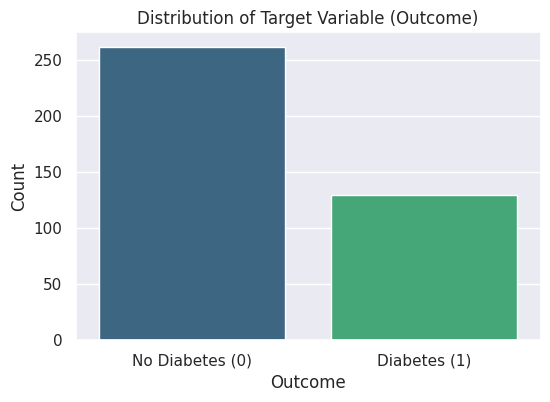


Class Balance (%):
Outcome
0    66.836735
1    33.163265
Name: proportion, dtype: float64


In [150]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.show()
print("\nClass Balance (%):")
print(df['Outcome'].value_counts(normalize=True) * 100)

##Correlation matrix

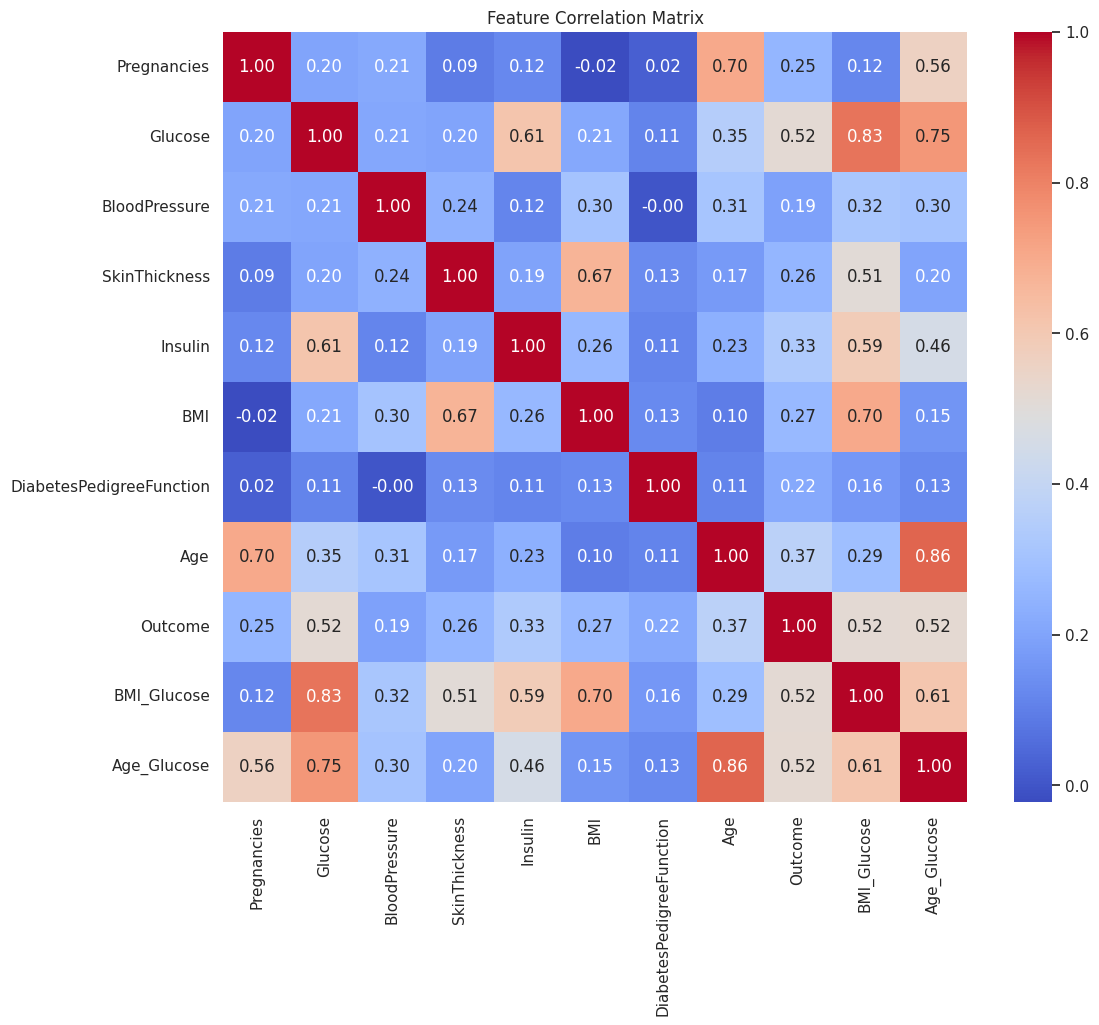

In [151]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

##Prepare data

In [152]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  )

##Handling imbalance using SMOTE.

In [153]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

##Scaling the data

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##PCA 90%

In [155]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

##Define models and parameter grids

In [156]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42)
}

LogisticRegression:
  Accuracy: 0.7712
  Time: 0.03s
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        79
           1       0.63      0.74      0.68        39

    accuracy                           0.77       118
   macro avg       0.75      0.76      0.75       118
weighted avg       0.78      0.77      0.78       118



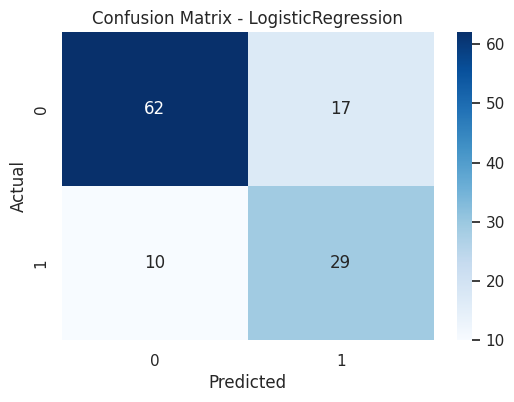

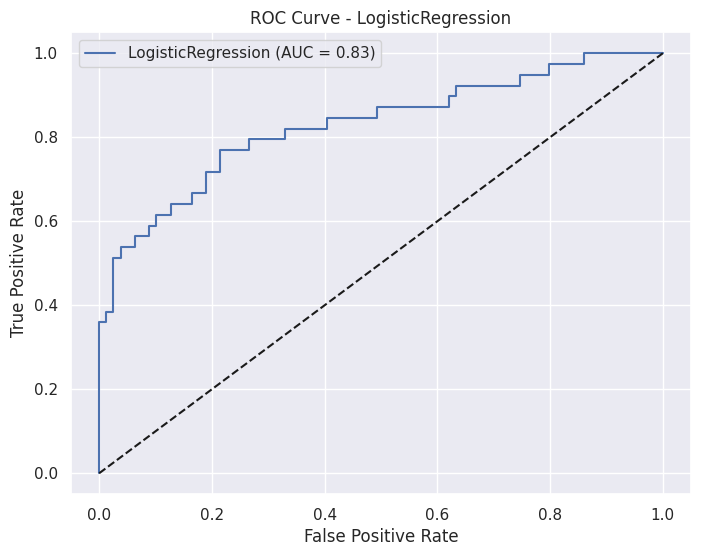

KNeighborsClassifier:
  Accuracy: 0.7712
  Time: 0.04s
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        79
           1       0.63      0.74      0.68        39

    accuracy                           0.77       118
   macro avg       0.75      0.76      0.75       118
weighted avg       0.78      0.77      0.78       118



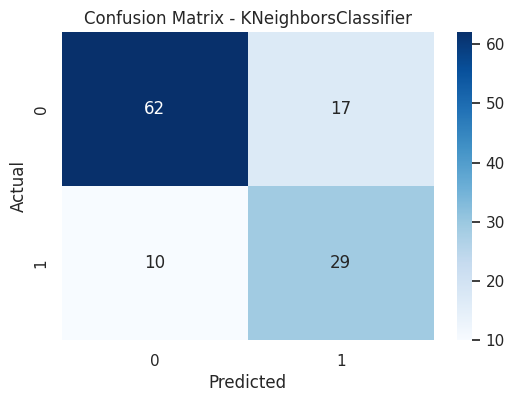

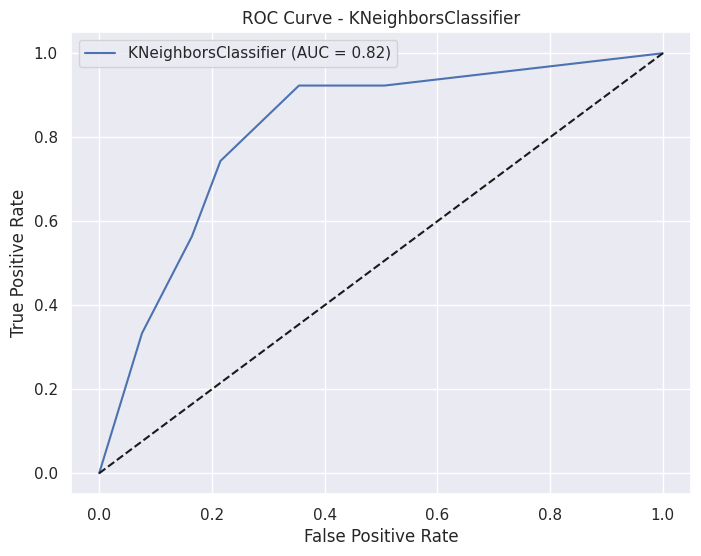

DecisionTreeClassifier:
  Accuracy: 0.7288
  Time: 0.03s
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        79
           1       0.57      0.69      0.63        39

    accuracy                           0.73       118
   macro avg       0.70      0.72      0.71       118
weighted avg       0.75      0.73      0.73       118



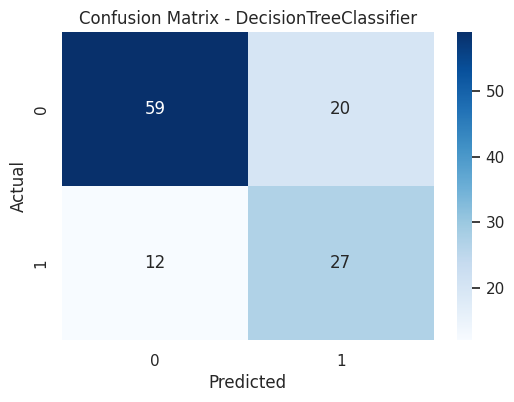

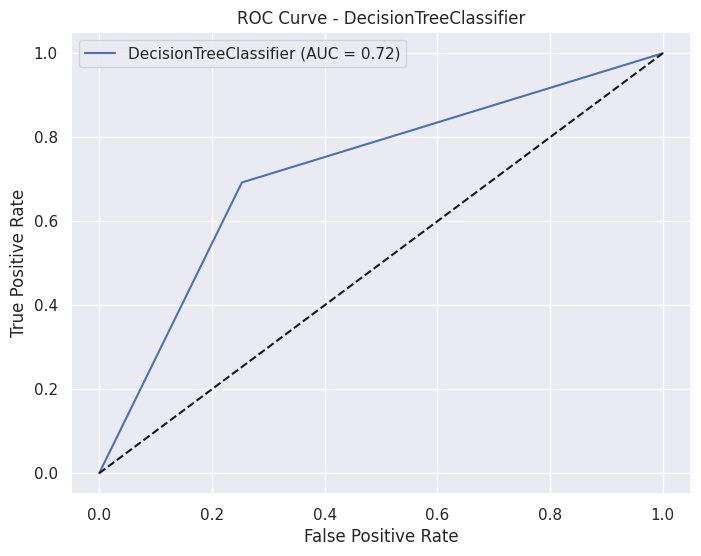

RandomForestClassifier:
  Accuracy: 0.7881
  Time: 0.42s
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        79
           1       0.65      0.77      0.71        39

    accuracy                           0.79       118
   macro avg       0.76      0.78      0.77       118
weighted avg       0.80      0.79      0.79       118



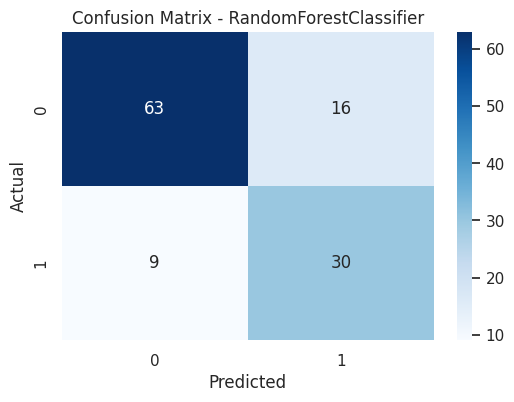

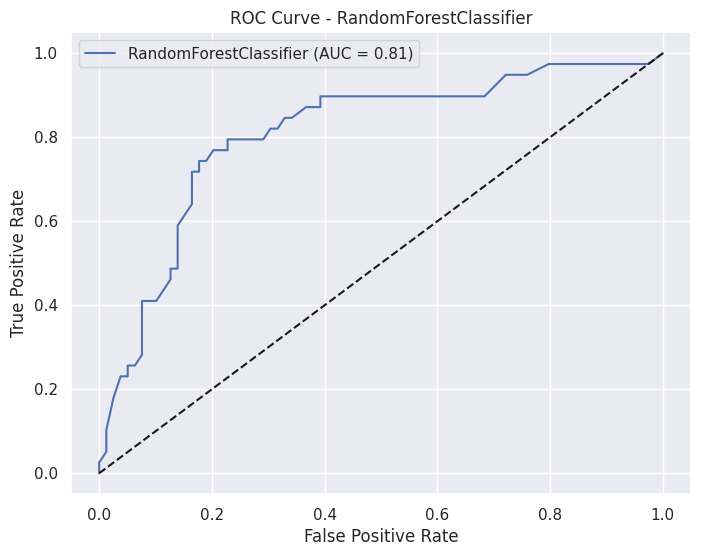

GradientBoostingClassifier:
  Accuracy: 0.7458
  Time: 0.26s
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        79
           1       0.60      0.69      0.64        39

    accuracy                           0.75       118
   macro avg       0.72      0.73      0.72       118
weighted avg       0.76      0.75      0.75       118



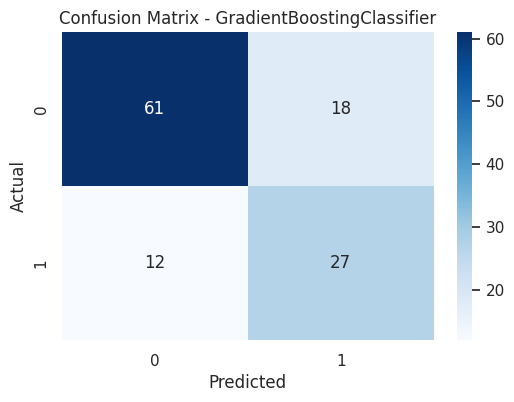

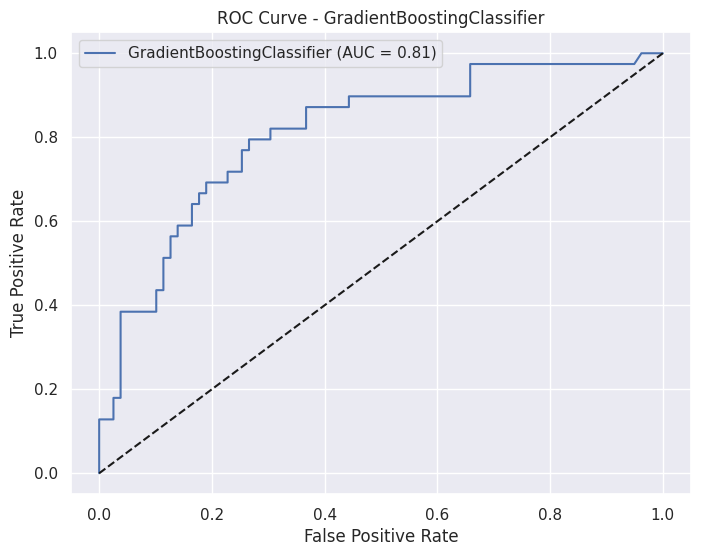

AdaBoostClassifier:
  Accuracy: 0.7542
  Time: 0.18s
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        79
           1       0.60      0.79      0.68        39

    accuracy                           0.75       118
   macro avg       0.74      0.76      0.74       118
weighted avg       0.79      0.75      0.76       118



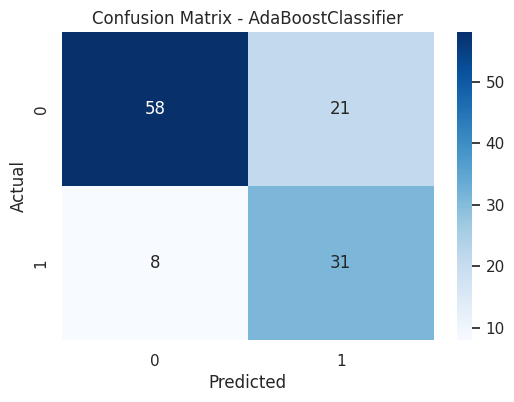

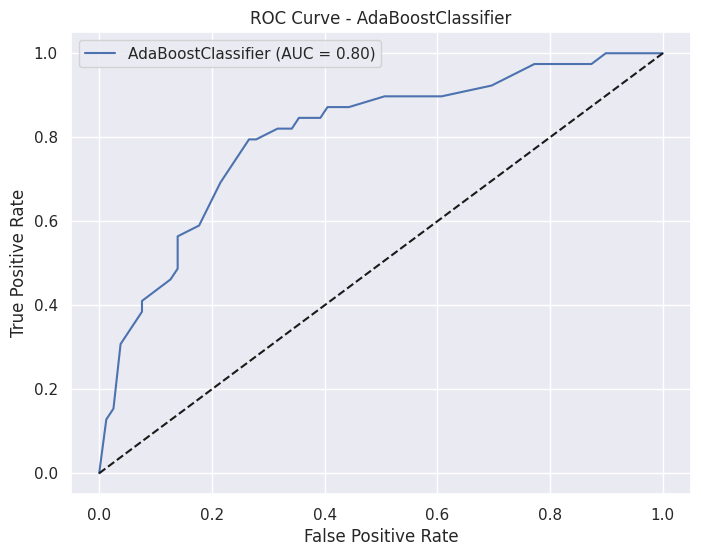

ExtraTreesClassifier:
  Accuracy: 0.7966
  Time: 0.18s
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        79
           1       0.67      0.74      0.71        39

    accuracy                           0.80       118
   macro avg       0.77      0.78      0.78       118
weighted avg       0.80      0.80      0.80       118



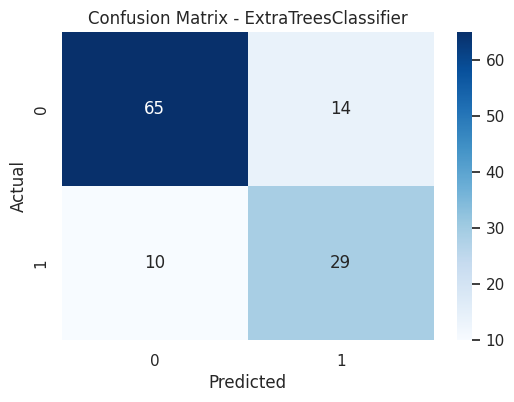

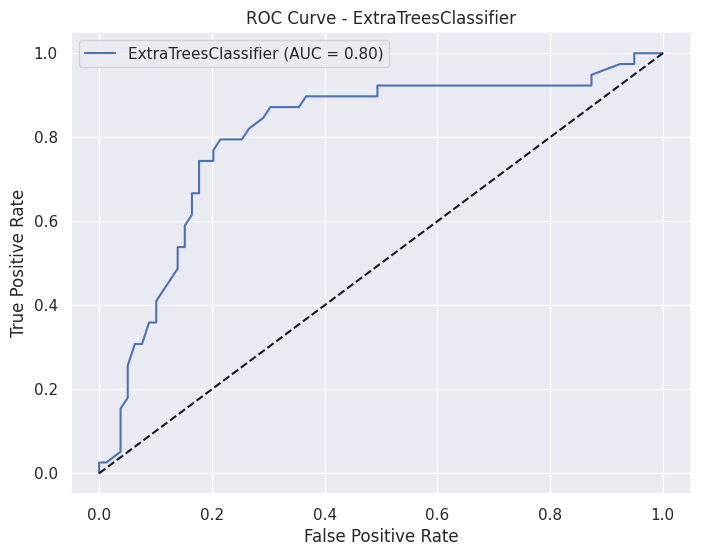

SVC:
  Accuracy: 0.7797
  Time: 0.06s
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        79
           1       0.63      0.79      0.70        39

    accuracy                           0.78       118
   macro avg       0.76      0.78      0.76       118
weighted avg       0.80      0.78      0.78       118



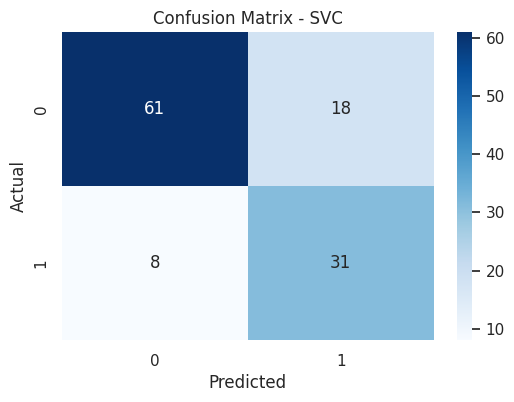

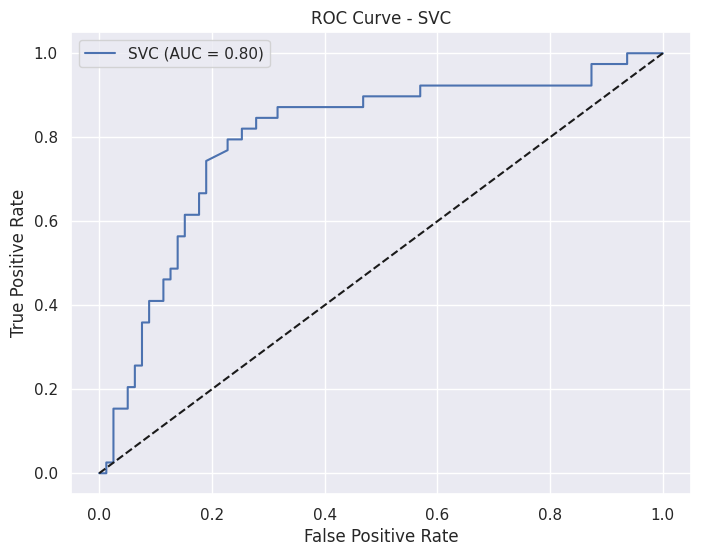

XGBClassifier:
  Accuracy: 0.7797
  Time: 0.10s
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        79
           1       0.65      0.72      0.68        39

    accuracy                           0.78       118
   macro avg       0.75      0.76      0.76       118
weighted avg       0.79      0.78      0.78       118



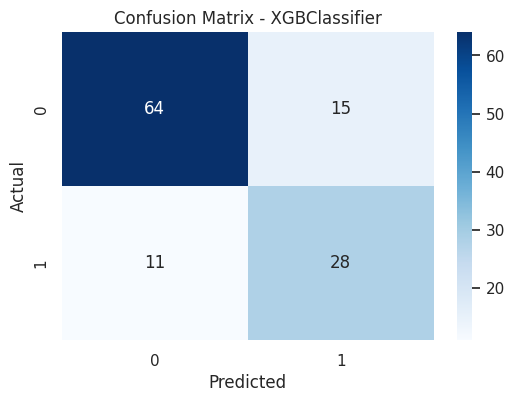

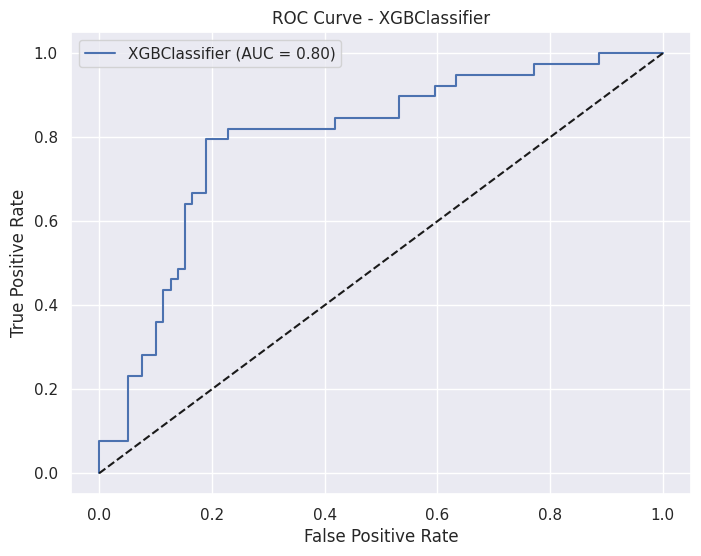

XGBoost:
  Accuracy: 0.7797
  Time: 0.10s
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        79
           1       0.65      0.72      0.68        39

    accuracy                           0.78       118
   macro avg       0.75      0.76      0.76       118
weighted avg       0.79      0.78      0.78       118



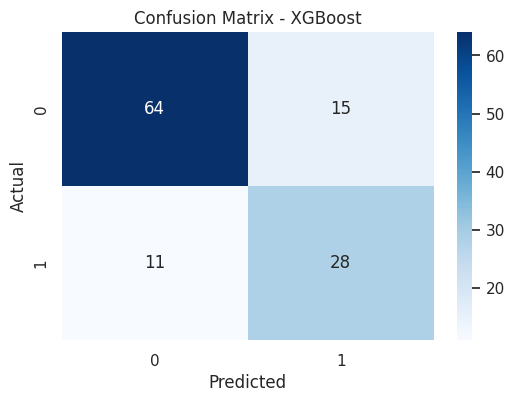

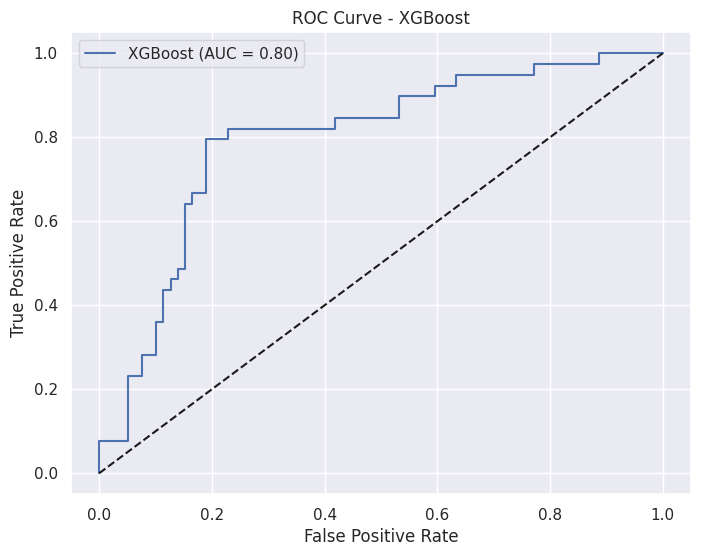

[LightGBM] [Info] Number of positive: 183, number of negative: 183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

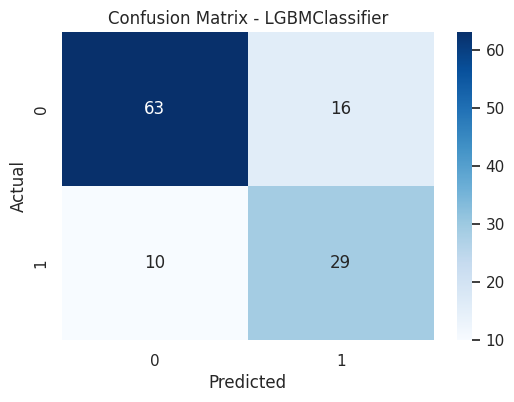

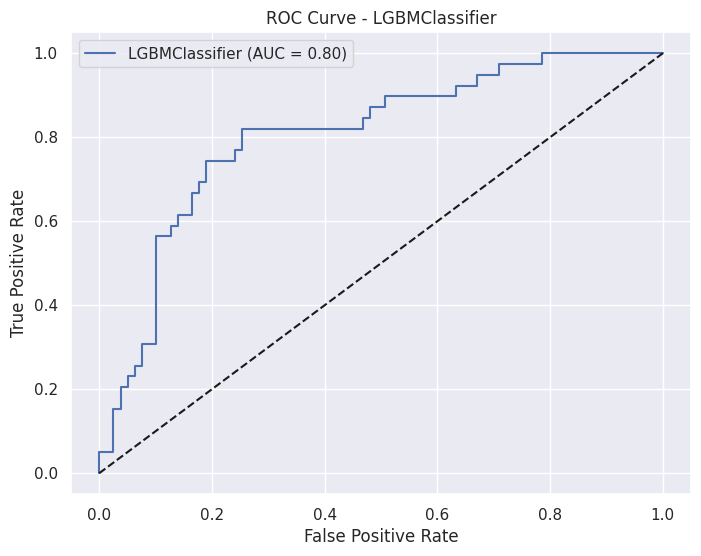

In [157]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Ensure the results DataFrame exists
if 'results' not in locals():
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Time (s)'])

for name, model in models.items():
    start = time.time()

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    pipeline = make_pipeline(
        StandardScaler(),
        PCA(n_components=0.95),
        model
    )

    pipeline.fit(X_train_resampled, y_train_resampled)

    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    elapsed_time = time.time() - start

    # Append results to the DataFrame
    new_row = pd.DataFrame([{
        'Model': name,
        'Accuracy': acc,
        'AUC': auc_score,
        'Time (s)': elapsed_time
    }])
    results = pd.concat([results, new_row], ignore_index=True)

    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Time: {elapsed_time:.2f}s")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

In [158]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_pca, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.7809


In [159]:
pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.90),
    GradientBoostingClassifier(random_state=42)
)

In [160]:
from imblearn.over_sampling import SMOTE # Import SMOTE

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1],
    'gradientboostingclassifier__max_depth': [3, 5]
}

# Apply SMOTE to the training data before GridSearchCV
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_resampled, y_train_resampled) # Fit on resampled data

# أفضل معلمات وأفضل دقة
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# تقييم النموذج الأمثل على بيانات الاختبار
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
final_acc = accuracy_score(y_test, y_pred)

print("\nFinal Model Performance:")
print(f"Test Accuracy: {final_acc:.4f}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 100}
Best Accuracy: 0.8033

Final Model Performance:
Test Accuracy: 0.7458
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        79
           1       0.60      0.69      0.64        39

    accuracy                           0.75       118
   macro avg       0.72      0.73      0.72       118
weighted avg       0.76      0.75      0.75       118



##Create a DataFrame to store results

In [173]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Time (s)', 'Best Parameters'])


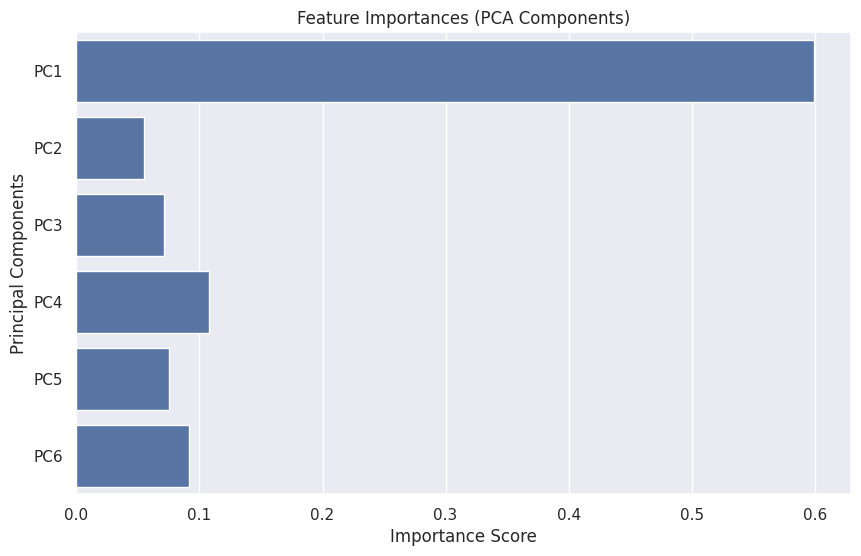

In [174]:
best_pipeline.fit(X_train_resampled, y_train_resampled) # Fit the best pipeline on the resampled training data
gb_model = best_pipeline.named_steps['gradientboostingclassifier']

# الحصول على أسماء الميزات بعد PCA
# Note: Feature importances are for the model *after* PCA, so they correspond to PCA components
feature_importances = gb_model.feature_importances_
pca_component_count = best_pipeline.named_steps['pca'].n_components_

# عرض أهمية الميزات
plt.figure(figsize=(10, 6))
# Generate feature names based on the number of PCA components
features = [f'PC{i+1}' for i in range(pca_component_count)]
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances (PCA Components)')
plt.xlabel('Importance Score')
plt.ylabel('Principal Components')
plt.show()

##Train and evaluate models

##Display results

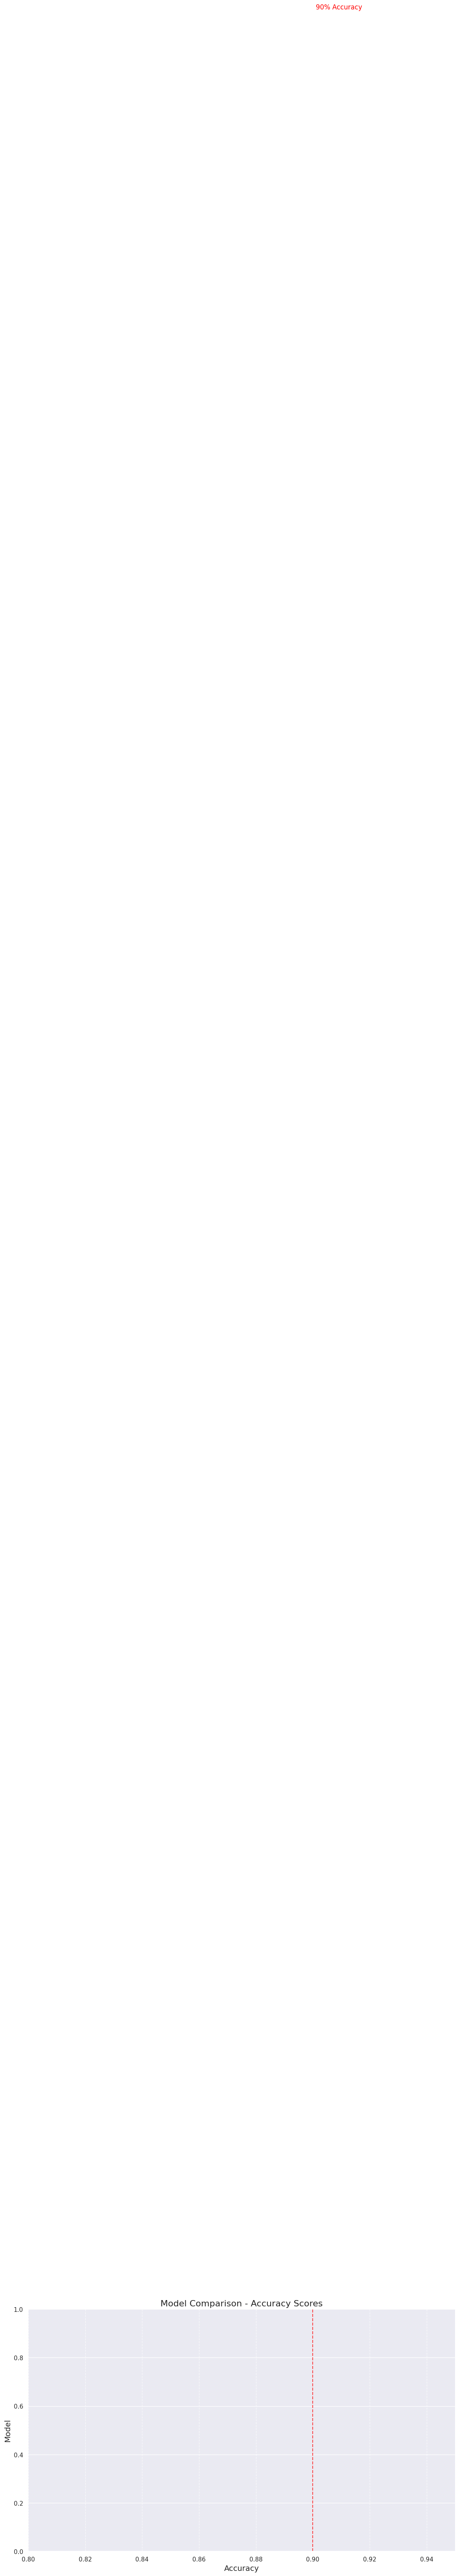

In [175]:
# إنشاء Bar Chart لمقارنة دقة النماذج
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis',
                 order=results_df.sort_values('Accuracy', ascending=False)['Model'])

# إضافة عنوان وتسميات المحاور
plt.title('Model Comparison - Accuracy Scores', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0.80, 0.95)  # ضبط نطاق المحور X

# إضافة قيم الدقة على الأعمدة
for i, v in enumerate(results_df.sort_values('Accuracy', ascending=False)['Accuracy']):
    ax.text(v + 0.003, i, f'{v:.4f}', color='black', va='center', fontweight='bold')

# إضافة خطوط شبكية
plt.grid(axis='x', linestyle='--', alpha=0.7)

# إضافة خط للدقة 90%
plt.axvline(x=0.90, color='red', linestyle='--', alpha=0.7)
plt.text(0.901, len(models)-0.5, '90% Accuracy', color='red', fontsize=12)

# تحسين المظهر
sns.despine(left=True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.4 MB/s eta 0:00:00
